<a href="https://colab.research.google.com/github/E-cmyk-debug/Revenue-Analysis/blob/main/Revenue_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
from google.colab import drive
# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loading the dataset from Google Drive
file_path = '/content/drive/MyDrive/Project Datasets/online_shoppers_intention.xlsx'
df = pd.read_excel(file_path)

In [ ]:
 # 1. Describing the dataset: Showing basic statistics and column names
print("\n--- Dataset Columns ---")
print(df.columns.tolist())

print("\n--- Basic Statistics ---")
print(df.describe(include='all')) #This will include categorical columns as well


--- Dataset Columns ---
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

--- Basic Statistics ---
        Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000 

In [ ]:
# 2.Checking for missing data
print("\n--- Missing Values in Each Column ---")
missing_values = df.isnull().sum()
print(missing_values)


--- Missing Values in Each Column ---
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
#since there is no missing values, checking for duplicates
print("\n--- Checking for Duplicates ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


--- Checking for Duplicates ---
Number of duplicate rows: 125


In [ ]:
#since there is duplicates, to reduce redundancy dropping the duplicate rows.
df = df.drop_duplicates()
print(f"Duplicates removed. New shape: {df.shape}")


Duplicates removed. New shape: (12205, 18)


In [ ]:
 # Checking for data types
print("\n--- Checking Data Types ---")
print(df.dtypes)


--- Checking Data Types ---
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [ ]:
# 3. Dataset Shape: Displaying the number of rows and columns
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


--- Dataset Shape ---
Rows: 12205, Columns: 18


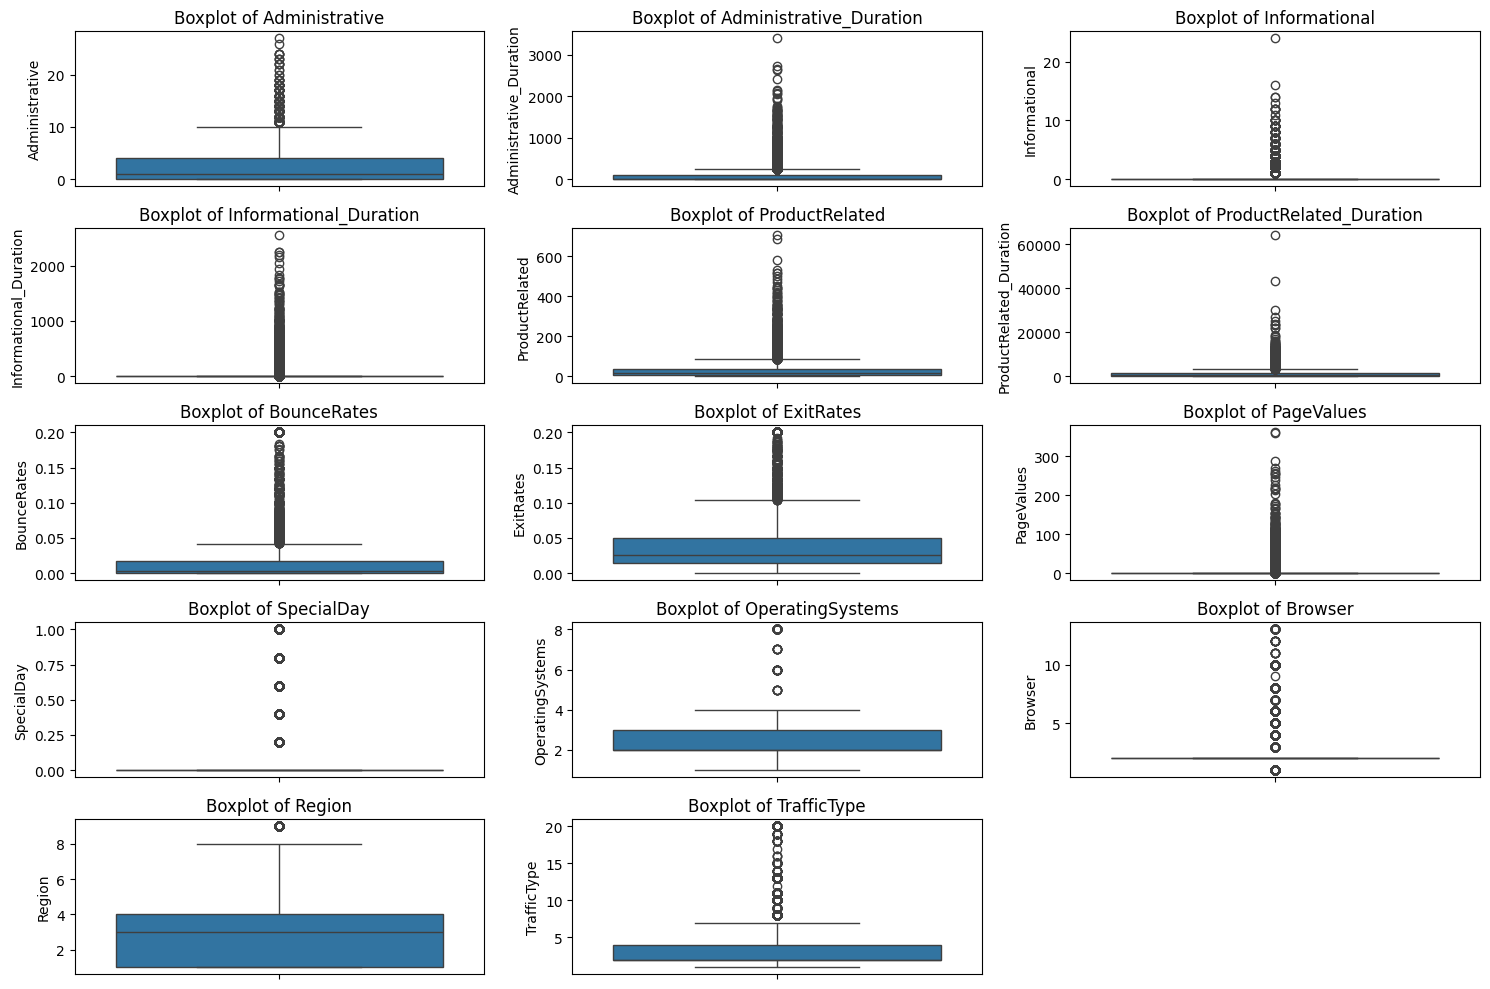

Administrative: 404 outliers
Administrative_Duration: 1172 outliers
Informational: 2631 outliers
Informational_Duration: 2405 outliers
ProductRelated: 987 outliers
ProductRelated_Duration: 961 outliers
BounceRates: 1551 outliers
ExitRates: 1099 outliers
PageValues: 2730 outliers
SpecialDay: 1251 outliers
OperatingSystems: 111 outliers
Browser: 4369 outliers
Region: 511 outliers
TrafficType: 2101 outliers
                    Feature  Outlier_Count
11                  Browser           4369
8                PageValues           2730
2             Informational           2631
3    Informational_Duration           2405
13              TrafficType           2101
6               BounceRates           1551
9                SpecialDay           1251
1   Administrative_Duration           1172
7                 ExitRates           1099
4            ProductRelated            987
5   ProductRelated_Duration            961
12                   Region            511
0            Administrative      

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#4. Outlier Treatment
# Selecting numerical features for outlier detection
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_features) == 0:
    print("No numerical features found in the dataset.")
else:
# Boxplots for outlier visualization
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_features):
        plt.subplot((len(numerical_features) + 2) // 3, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# IQR method for outlier detection
    def detect_outliers_iqr(data, feature):
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        print(f"{feature}: {len(outliers)} outliers")
        return outliers

# Checking outliers for each numerical feature
    outlier_summary = {}
    for col in numerical_features:
        outliers = detect_outliers_iqr(df, col)
        outlier_summary[col] = outliers

# Summary of outliers per feature
    total_outliers = {k: len(v) for k, v in outlier_summary.items()}
    outlier_df = pd.DataFrame(list(total_outliers.items()), columns=['Feature', 'Outlier_Count'])
    print(outlier_df.sort_values(by='Outlier_Count', ascending=False))



The above output depicts presence outliers in the dataset. It is presented visually using boxplot and as well as numerically. Key observations for each feature are as follows:
1. *Administrative & Administrative_Duration* -
Data is skewed with a majority of values clustered near the lower range. The outliers probably indicate some users spend significantly more time on administrative pages.

2. *Informational & Informational_Duration* -
Most values are low, suggesting only few users visit informational pages. However, a few extreme outliers indicate where users spent much longer durations.

3. *ProductRelated & ProductRelated_Duration* -
Here, the large number of outliers, indicates variability in how users interact with product-related pages.
Some users spend an unusually long time here, potentially indicating purchase intent.

4. *BounceRates & ExitRates* -
Most values are low, but a dense cluster of outliers indicates many users leave the site quickly from certain pages.

5. *PageValues* -
Predominantly low values with some outliers showing high page value, possibly linked to successful transactions or key pages.

6. *SpecialDay* -
Mostly zero, however, with few higher values, suggesting few visits occur close to special occasions.

7. *OperatingSystems & Browser* -
Most users use a common OS and browser, but there are outliers showing a variety of user configurations.

8. *Region* -
Users are distributed across different regions, though some regions dominate.

9. *TrafficType* -
Few traffic sources dominate, while many others are rarely used.

Overall, the data has a right-skewed distribution for most features, with many outliers, suggesting heterogeneous user behavior.


In [ ]:
#As not all features are directly impacted, only outliers in crucial features are capped
import pandas as pd
import numpy as np

# Crucial features for outlier capping
crucial_features = [
    'BounceRates', 'ExitRates', 'PageValues', 'ProductRelated', 'ProductRelated_Duration',
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'Month', 'Weekend', 'SpecialDay'
]

# Function to cap outliers using the IQR method
def cap_outliers(df, features):
    for feature in features:
        # Skipping features that has missing or identical values
        if df[feature].nunique() <= 1 or df[feature].isnull().all():
            print(f"Skipped '{feature}': Not enough data for IQR calculation.")
            continue

        # Calculate IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        if pd.isna(IQR) or IQR == 0:
            print(f"Skipped '{feature}': IQR is NaN or zero.")
            continue

        # Defining outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping the outliers
        df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

        print(f"Capped outliers in '{feature}' - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    return df

df = cap_outliers(df, features_to_cap)


Capped outliers in 'BounceRates' - Lower Bound: -0.03, Upper Bound: 0.04
Capped outliers in 'ExitRates' - Lower Bound: -0.04, Upper Bound: 0.10
Skipped 'PageValues': Not enough data for IQR calculation.
Capped outliers in 'ProductRelated' - Lower Bound: -39.50, Upper Bound: 84.50
Capped outliers in 'ProductRelated_Duration' - Lower Bound: -1735.89, Upper Bound: 3384.19
Capped outliers in 'Administrative' - Lower Bound: -6.00, Upper Bound: 10.00
Capped outliers in 'Administrative_Duration' - Lower Bound: -139.88, Upper Bound: 233.14
Skipped 'Informational': Not enough data for IQR calculation.
Skipped 'Informational_Duration': Not enough data for IQR calculation.
Skipped 'Month': Not enough data for IQR calculation.


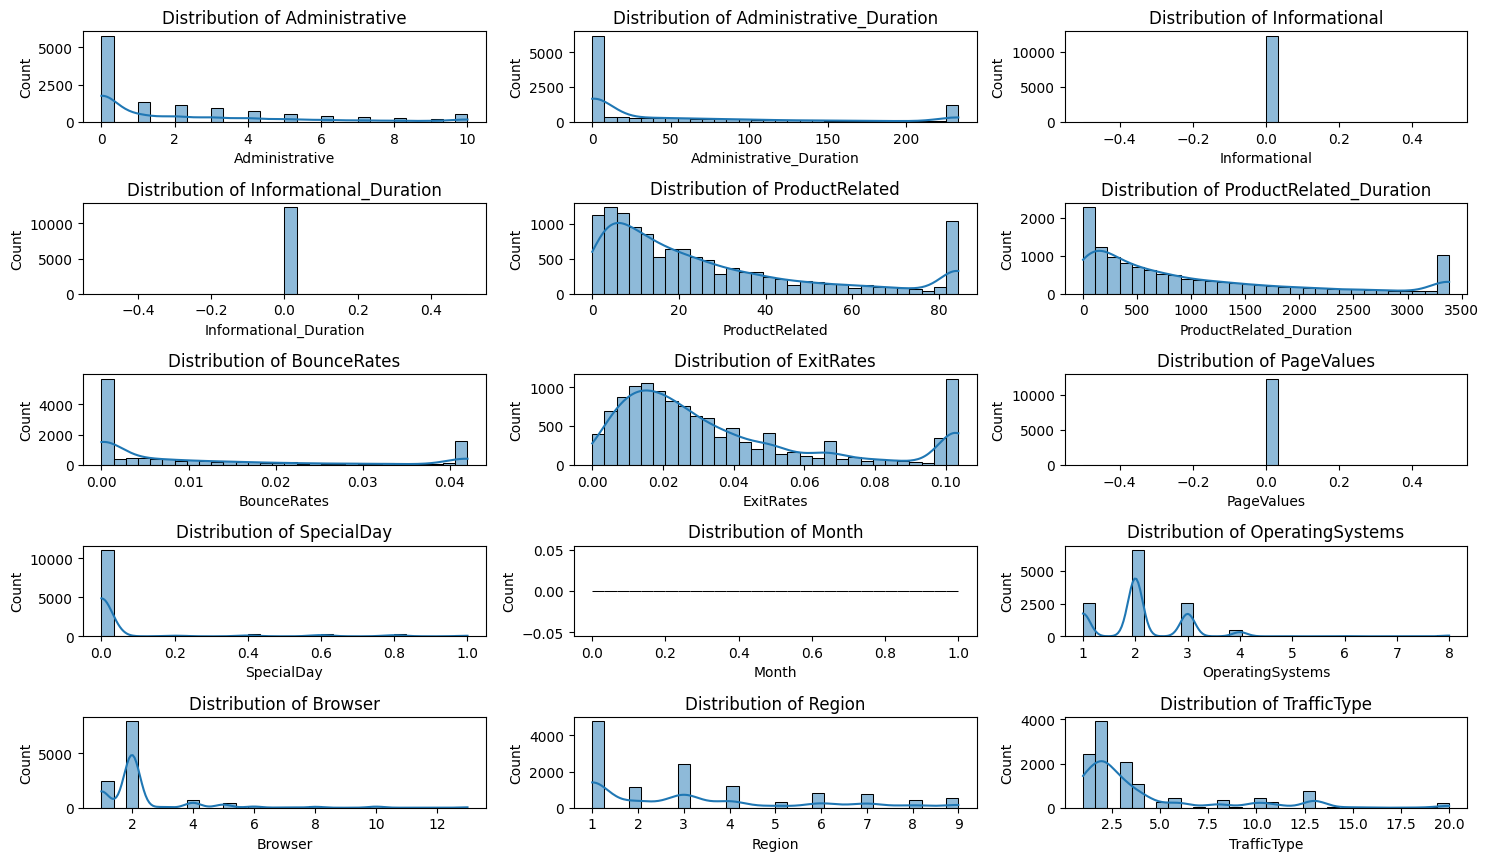

In [ ]:
#5  Addressing skewed data in numerical features through transformations.
# Visualization of skewness using histograms
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The above output of histogram depicts skewness of the features in the dataset. 1. *Highly Right-Skewed Distributions:*
For features such as **Administrative, Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates, SpecialDay, PageValues**, most data points are concentrated near zero.

2. *Moderate Skewness:*
for, **ProductRelated** shows a right-skewed distribution but more spread out compared to others.

3.*Uniform Distributions:*
**Month** appears nearly flat, suggesting uniform distribution across values.

4. Categorical/Discrete Numerical Data: *italicized text*
For, **Browser, OperatingSystems, Region, TrafficType** displays peaks at integer values, indicating discrete counts.

5. *ExitRates:*
This shows some skewness but with a more even spread than other rate-based features.


In [ ]:
# Addressing Skewness using Transformations.
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson

# Selecting numerical features only
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Quantifying skewness before transformation
skew_values_before = df[numerical_features].skew()
print("Skewness before transformation:\n", skew_values_before)

# Applying transformations (different transformations are used since certain issues regarding non-positive values and zero occurred).
def apply_transformations(df, features, skew_values):
    for feature in features:
        skewness = skew_values[feature]
        try:
            if skewness > 1:
                # Highly right-skewed: Log transformation
                min_value = df[feature].min()
                if min_value <= 0:
                    shift = abs(min_value) + 1
                    df[feature] = np.log1p(df[feature] + shift)
                    print(f"Applied log transformation with shift ({shift}) for '{feature}'.")
                else:
                    df[feature] = np.log1p(df[feature])
                    print(f"Applied log transformation for '{feature}'.")

            elif 0.5 < skewness <= 1:
                # Moderate skewness: Square root transformation
                min_value = df[feature].min()
                if min_value < 0:
                    shift = abs(min_value)
                    df[feature] = np.sqrt(df[feature] + shift)
                    print(f"Applied square root transformation with shift ({shift}) for '{feature}'.")
                else:
                    df[feature] = np.sqrt(df[feature])
                    print(f"Applied square root transformation for '{feature}'.")

            else:
                # Low or negative skewness: Yeo-Johnson transformation
                if df[feature].isnull().any() or not np.isfinite(df[feature]).all():
                    raise ValueError(f"Non-finite values detected in '{feature}'.")
                transformed_data, lambda_val = yeojohnson(df[feature])
                df[feature] = transformed_data
                print(f"Applied Yeo-Johnson transformation for '{feature}' with lambda = {lambda_val:.4f}.")

        except ValueError as e:
            print(f"Error transforming '{feature}': {e}")

# Applying the transformations
apply_transformations(df, numerical_features, skew_values_before)

# Quantifying skewness after transformation
skew_values_after = df[numerical_features].skew()
print("Skewness after transformation:\n", skew_values_after)

print("Skewness has been addressed using log, square root, and Yeo-Johnson transformations based on skewness levels.")


Skewness before transformation:
 Administrative             0.202359
Administrative_Duration    0.014343
Informational              0.000000
Informational_Duration     0.000000
ProductRelated            -0.095483
ProductRelated_Duration   -0.342156
BounceRates                1.186705
ExitRates                  1.089452
PageValues                 0.000000
SpecialDay                 3.108475
Month                           NaN
OperatingSystems           0.005265
Browser                    0.517479
Region                     0.024584
TrafficType                0.036311
dtype: float64
Applied Yeo-Johnson transformation for 'Administrative' with lambda = -17.5242.
Applied Yeo-Johnson transformation for 'Administrative_Duration' with lambda = 0.0323.
Applied Yeo-Johnson transformation for 'Informational' with lambda = 9.7576.
Applied Yeo-Johnson transformation for 'Informational_Duration' with lambda = 9.7576.
Applied Yeo-Johnson transformation for 'ProductRelated' with lambda = 1.0003.
Appl

Interpretation:
The applied transformations,significantly reduced skewness in most features. For instance, Administrative skewness decreased from 0.2024 to 0.1170, and Browser reduced from 0.5175 to 0.3311. Highly skewed features like SpecialDay (3.1085 to 3.0893) and BounceRates (1.1867 to 1.1852) showed slight improvements. Notably, transformations resulted in negative skewness for features such as Informational and PageValues, shifting from 0 to -1.0001. However, Month remained untransformed due to non-finite values. Overall, the transformations enhanced data symmetry, improving the suitability of the dataset for modeling.

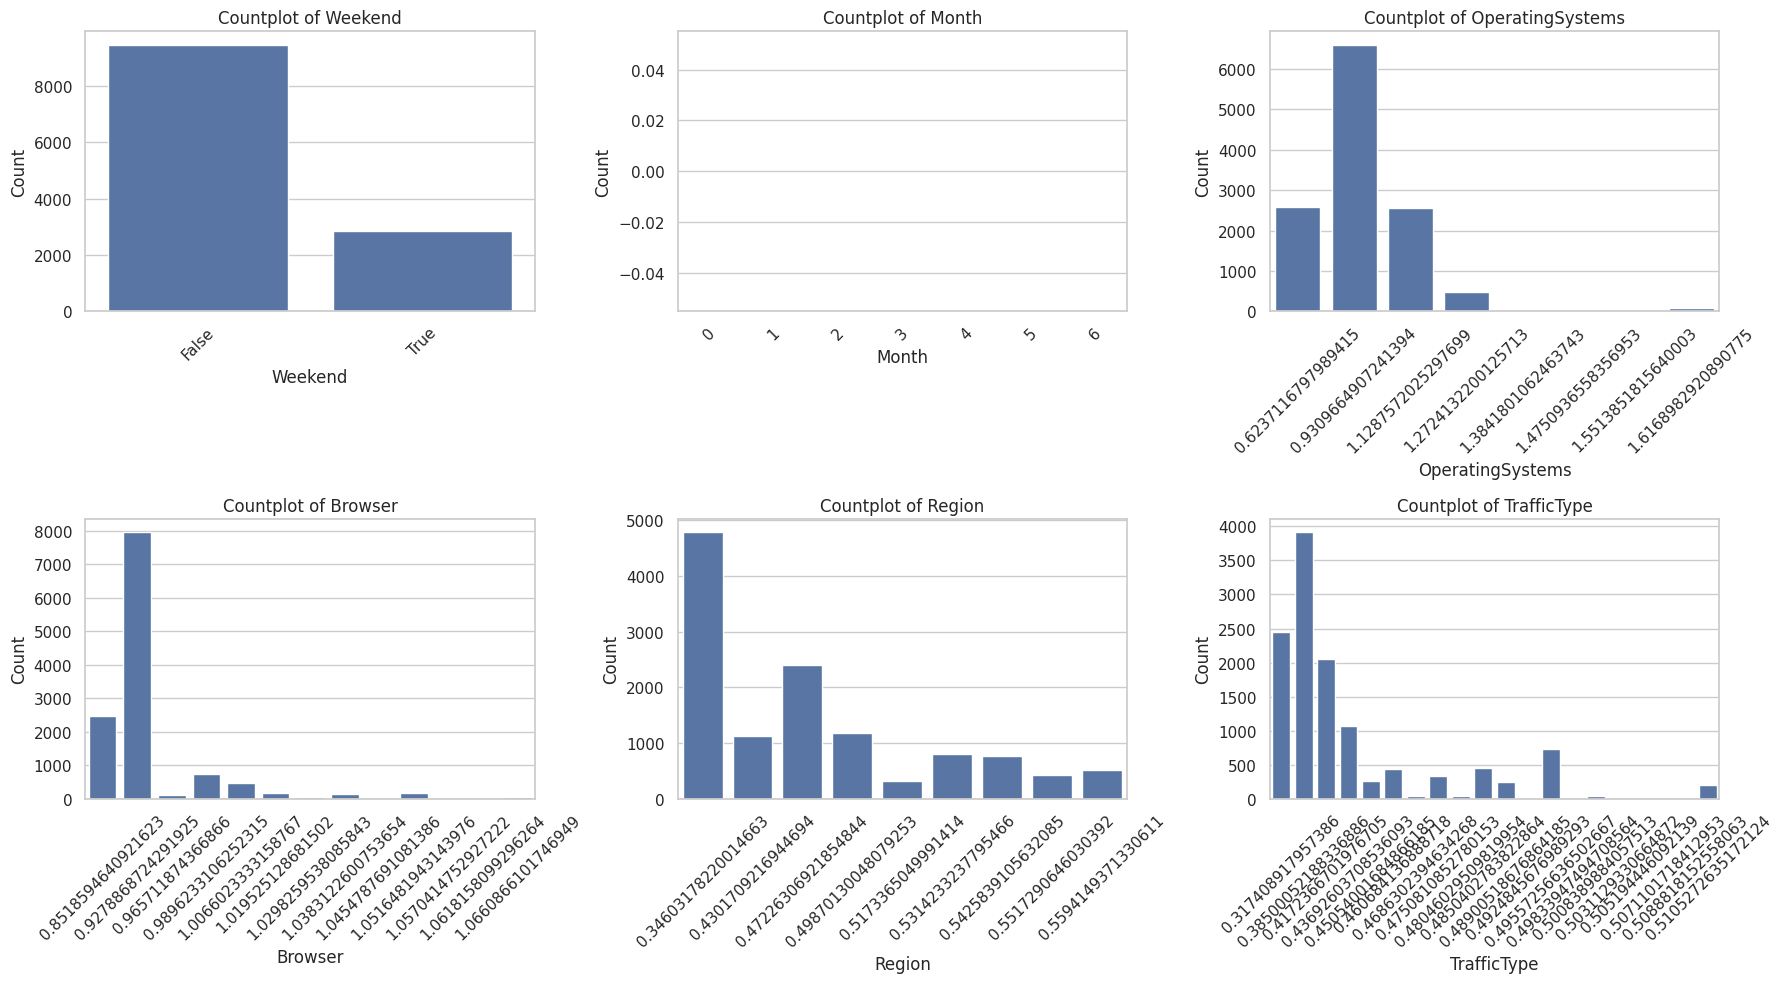

In [ ]:
#6. Exploratory Data Analysis:
# Univariate Analysis (categorical data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

# Univariate Analysis using Countplots for Categorical Variables
def plot_countplots(df):
    categorical_features = ['Weekend', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
    num_features = len(categorical_features)
    cols = 3
    rows = (num_features + cols - 1) // cols

    plt.figure(figsize=(18, 5 * rows))

    for idx, feature in enumerate(categorical_features):
        plt.subplot(rows, cols, idx + 1)
        sns.countplot(x=feature, data=df)
        plt.title(f"Countplot of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_countplots(df)


The above outpuut depicts univariate analysis for categorical variables using countplots. The major points are:

1. For feature** Weekend**, the majority of sessions occur on weekdays (False), with fewer sessions on weekends (True).

2. For **Month**, the plot shows no visible distribution.

3. The skewed distributions for **OperatingSystems, Browser, and TrafficType** suggest user preference for certain platforms and traffic sources.

4. The distribution of **Region** shows a concentration in one or two regions, with other regions having significantly fewer sessions.


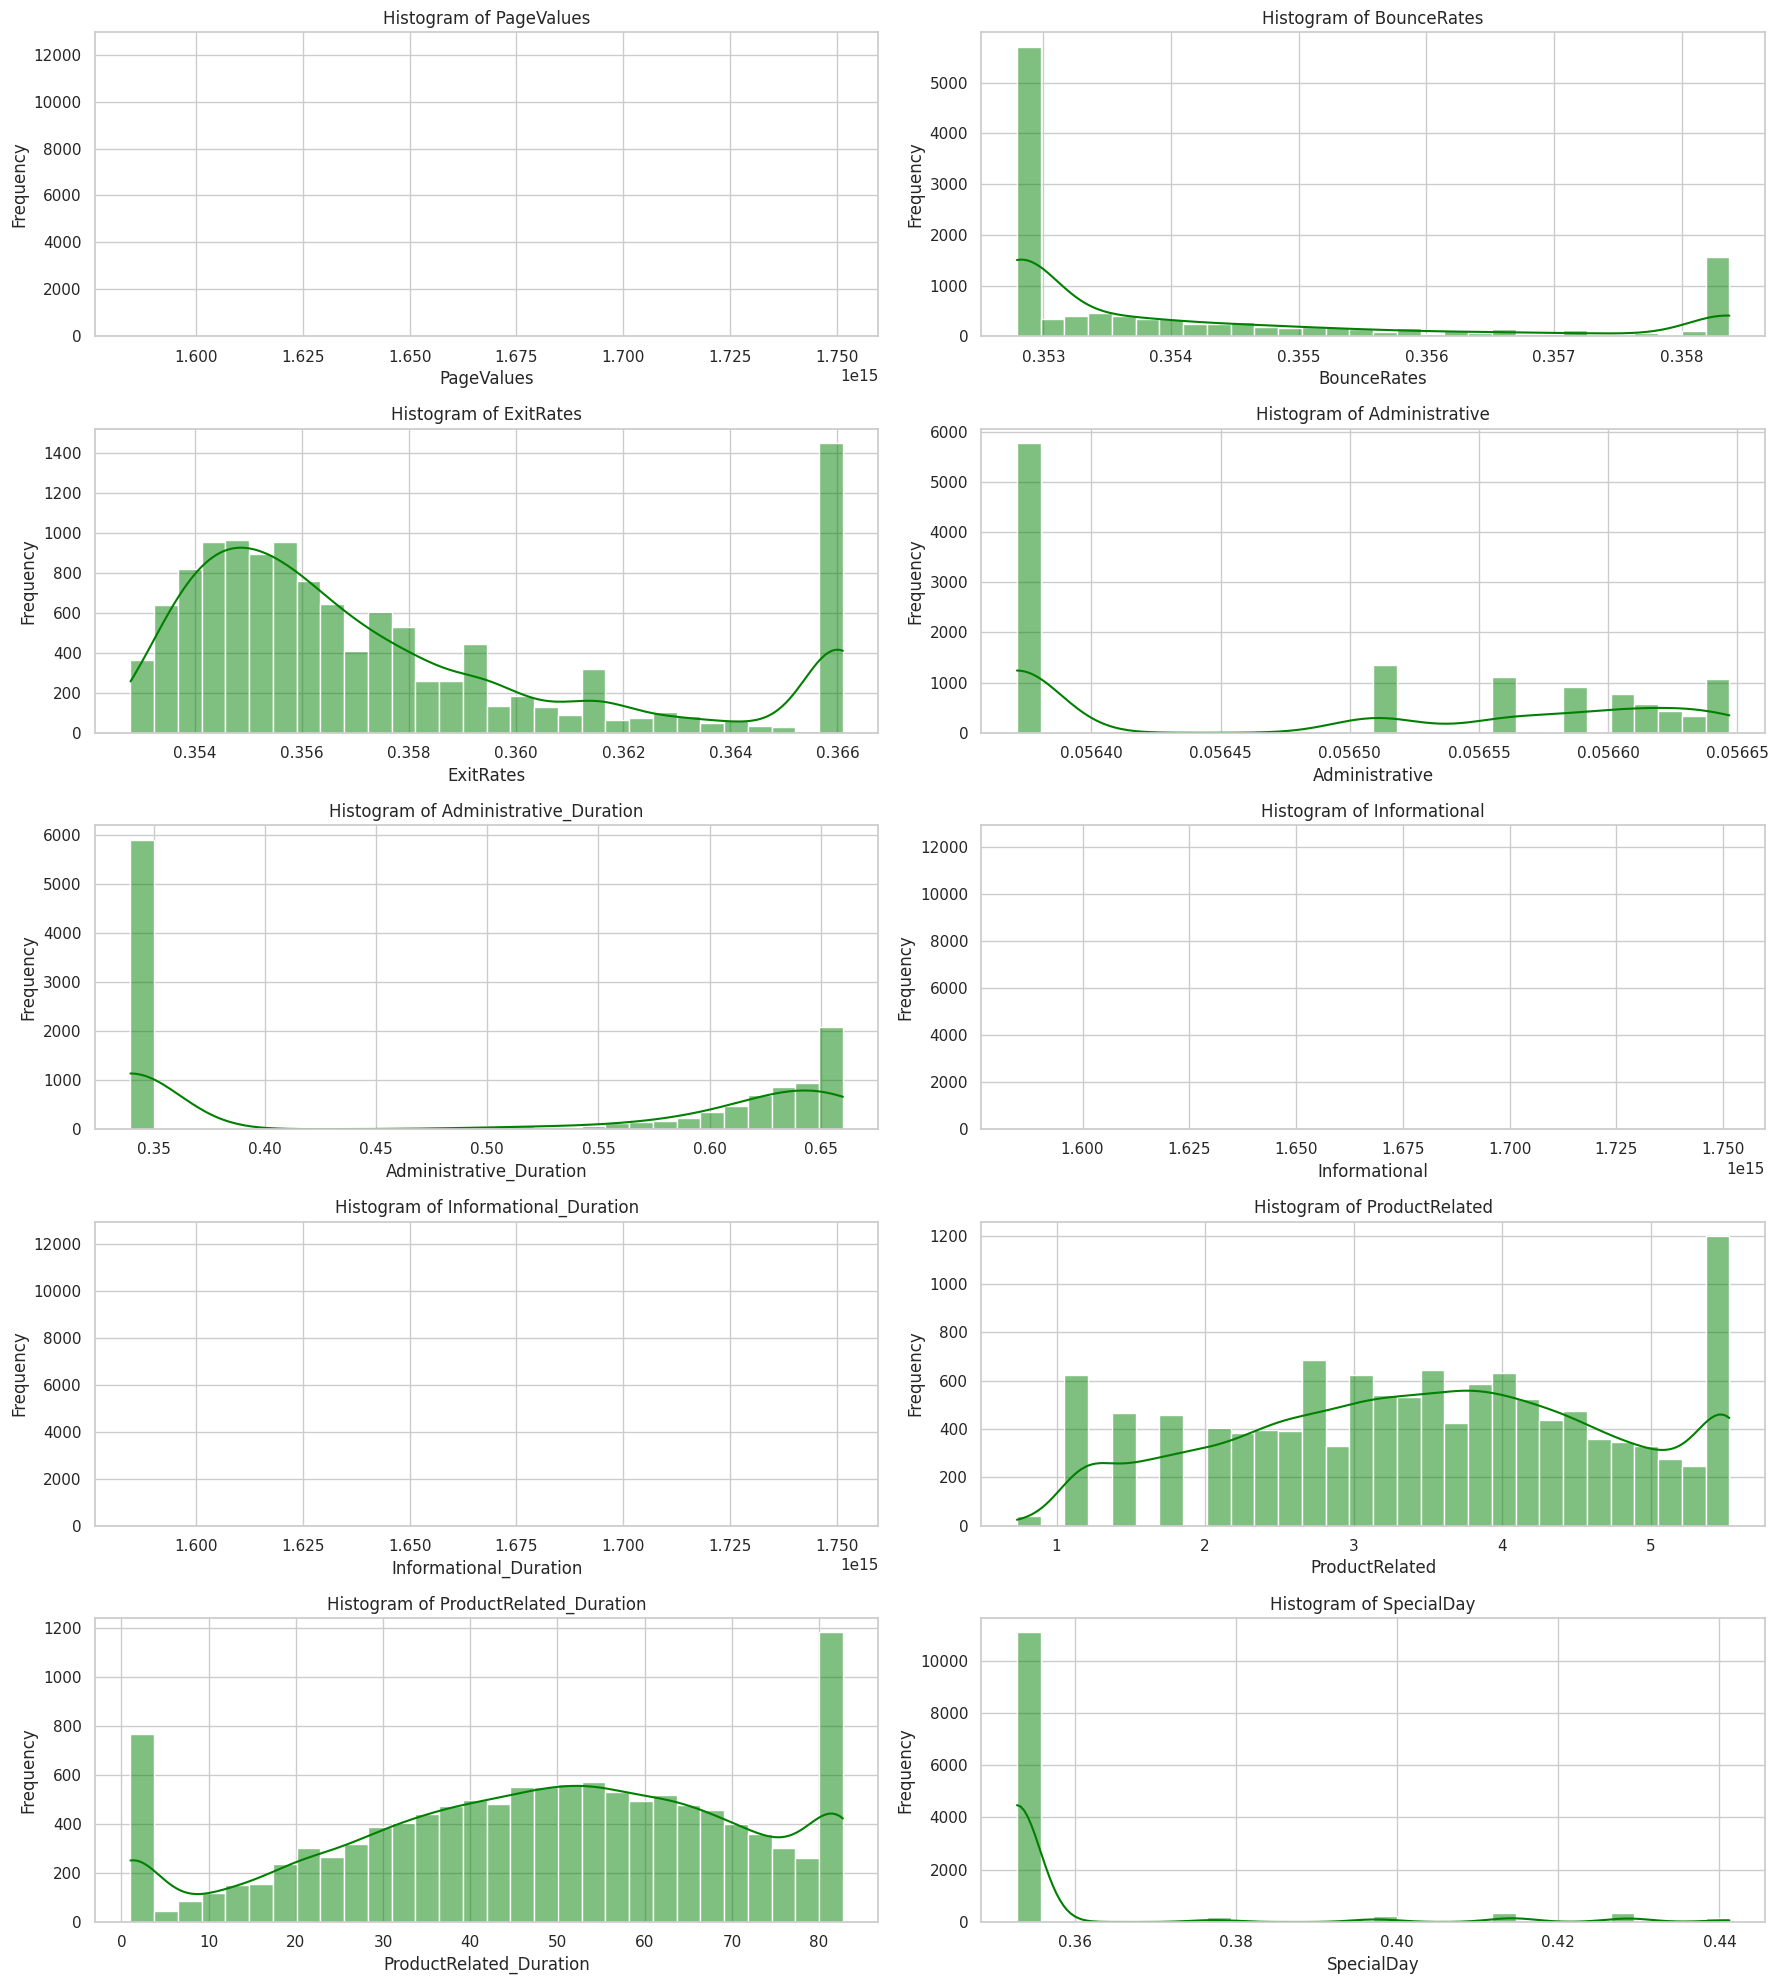

In [ ]:
#6. Exploratory Data Analysis:
# Univariate Analysis (Numerical data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

# Univariate Analysis using Histograms for Numerical Data
def plot_histograms(df):
    numerical_features = [
        'PageValues', 'BounceRates', 'ExitRates',
        'Administrative', 'Administrative_Duration',
        'Informational', 'Informational_Duration',
        'ProductRelated', 'ProductRelated_Duration',
        'SpecialDay'
    ]

    plt.figure(figsize=(18, 20))

    for idx, feature in enumerate(numerical_features):
        plt.subplot(5, 2, idx + 1)
        sns.histplot(df[feature], kde=True, color='green', bins=30)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()
plot_histograms(df)


The above output depicts univariate analysis using histograms for numerical features, keypoints are:

1. For,**BounceRates and ExitRates** have narrow distributions, indicating limited variability in user bounce and exit behaviors.

3. **Administrative** depicts strong right skew with most values near 0.0564, suggesting users rarely engage with administrative pages.

4. However, **Administrative_Duration** is heavily right-skewed with a peak at lower durations (~0.35) and a second cluster at higher values (~0.65).

5. **ProductRelated** distribution appears more spread out but slightly right-skewed, with a gradual decline after a peak around 3–5.

6. **ProductRelated_Duration** shows a bimodal distribution with peaks near 0 and around 80, suggesting two distinct user behaviors and varied engagement levels.

7. **SpecialDay** is highly skewed towards the lower end (~0.35), indicate most user interactions occur far from special days.

8. Overall, features such as **PageValues, Informational, Informational_Duration **show unusual variation hinting on default values.



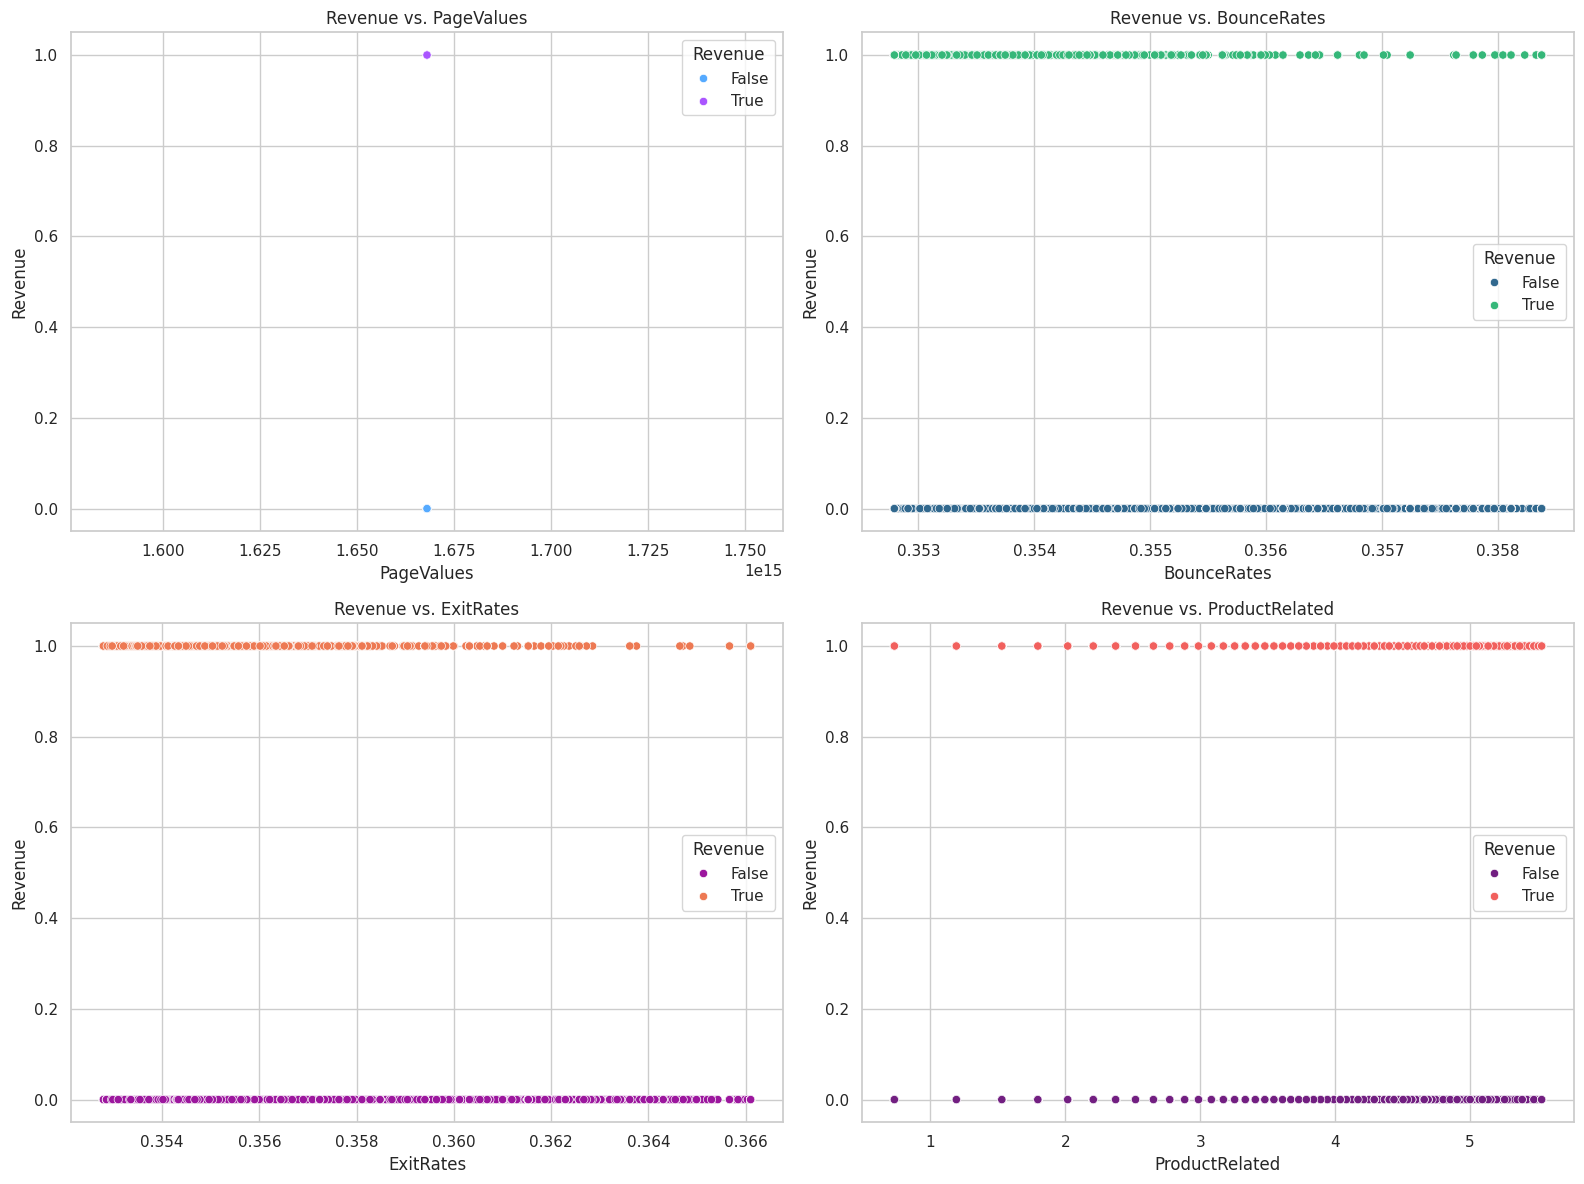

In [ ]:
#6. Exploratory Data Analysis:
# Bivariate analysis using scatterplot for revenue and numerical features.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting plot style
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter Plot: Revenue vs. PageValues
sns.scatterplot(ax=axes[0, 0], data=df, x='PageValues', y='Revenue', hue='Revenue', palette='cool')
axes[0, 0].set_title('Revenue vs. PageValues')
axes[0, 0].set_xlabel('PageValues')
axes[0, 0].set_ylabel('Revenue')

# Scatter Plot: Revenue vs. BounceRates
sns.scatterplot(ax=axes[0, 1], data=df, x='BounceRates', y='Revenue', hue='Revenue', palette='viridis')
axes[0, 1].set_title('Revenue vs. BounceRates')
axes[0, 1].set_xlabel('BounceRates')
axes[0, 1].set_ylabel('Revenue')

# Scatter Plot: Revenue vs. ExitRates
sns.scatterplot(ax=axes[1, 0], data=df, x='ExitRates', y='Revenue', hue='Revenue', palette='plasma')
axes[1, 0].set_title('Revenue vs. ExitRates')
axes[1, 0].set_xlabel('ExitRates')
axes[1, 0].set_ylabel('Revenue')

# Scatter Plot: Revenue vs. ProductRelated
sns.scatterplot(ax=axes[1, 1], data=df, x='ProductRelated', y='Revenue', hue='Revenue', palette='magma')
axes[1, 1].set_title('Revenue vs. ProductRelated')
axes[1, 1].set_xlabel('ProductRelated')
axes[1, 1].set_ylabel('Revenue')

# Adjusting layout for clarity
plt.tight_layout()
plt.show()


The above output indicates bivariate analysis using scatterplot for revenue and numerical features.
 1. **Revenue vs. PageValues**: There are only a few data points, with most of them concentrated around high PageValues. Which means higher PageValues seem to correlate with transactions resulting in revenue (True). This suggests that pages contributing higher monetary value are more likely linked to successful purchases.
2. **Revenue vs. BounceRates**: Data points are densely clustered with minimal variance in BounceRates, resulting in assumnig that BounceRate does not show a clear relationship with revenue generation. This further indicates that whether a user exits after viewing a single page may not strongly affect the likelihood of making a purchase in this dataset.
3. **Revenue vs. ExitRates**: Similar to BounceRates, ExitRates show minimal variation, with a dense clustering pattern. Like BounceRates, ExitRates appear not to be a strong determinant of revenue. This may imply that exits from certain pages does not significantly impact purchase behavior.
4. **Revenue vs. ProductRelated**: Data points for revenue-generating sessions (True) tend to be associated with higher values of ProductRelated page visits, implying that a clear trend emerges—users who view more product-related pages are more likely to convert, highlighting that product engagement drives purchases.

Thus to conclude, Product-related engagement and PageValues are the most significant predictors of revenue generation.



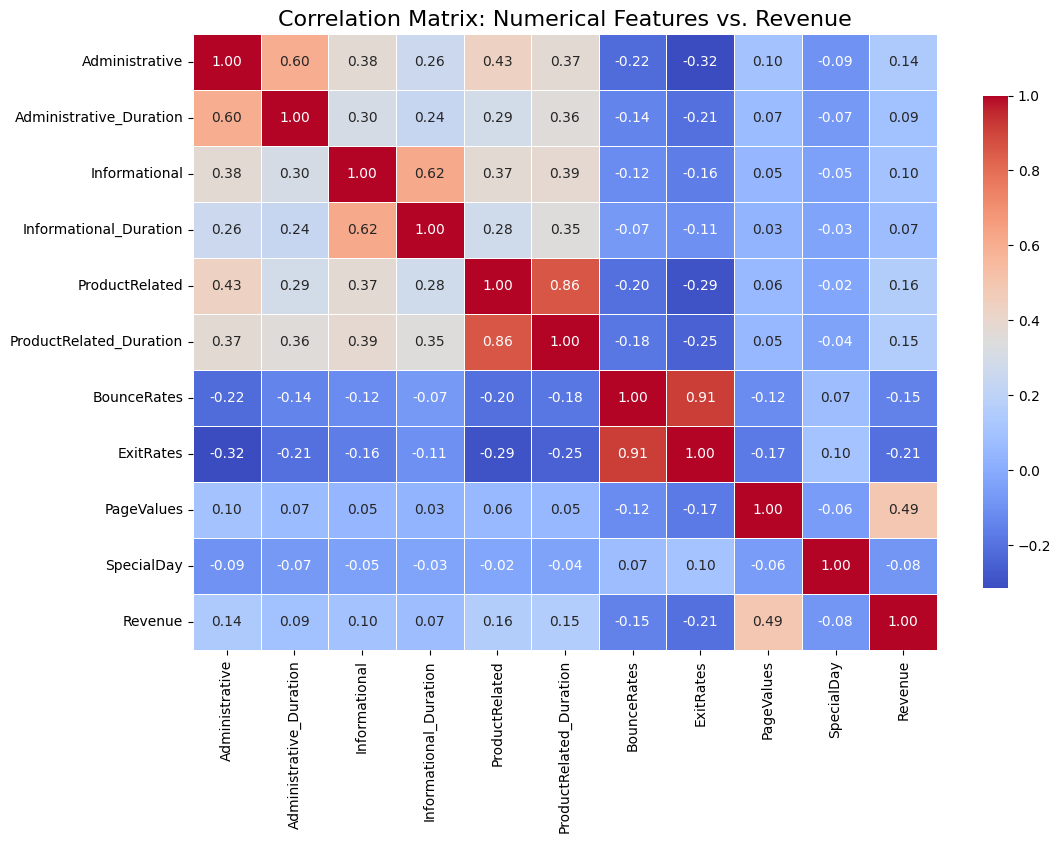

In [ ]:
#6. Exploratory Data Analysis:
# Bivariate analysis using Heatmap for feature correlation with revenue.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical features including 'Revenue'
numerical_features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue'
]

# Computing the correlation matrix
correlation_matrix = df[numerical_features].corr()

# To set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Creating the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

# to add title and display the heatmap
plt.title('Correlation Matrix: Numerical Features vs. Revenue', fontsize=16)
plt.show()


The heatmap shows the correlation matrix between Revenue and various numerical features. The color scale ranges from blue (negative correlation) to red (positive correlation), with the correlation coefficients ranging from -1 to +1.

Key Insights:

1. **PageValues (0.49)** have moderate positive correlation; which insights that users who view pages with higher value such as those related to purchases or key product pages are more likely to generate revenue. This suggests that page value optimization could boost sales.

2. **ProductRelated (0.16) and ProductRelated_Duration (0.15)** have Weak positive correlation, which means spending more time on product-related pages slightly increases the likelihood of purchase. However, the correlation is not strong, indicating that just browsing is not enough rather engagement must be meaningful.

3. **Administrative (0.14), Administrative_Duration (0.09), Informational (0.10), and Informational_Duration (0.07)** shows very weak positive correlation; meaning administrative and informational pages have minimal impact on revenue. Perhaps streamlining these sections could help users focus on revenue-generating pages.

4. **BounceRates (-0.15) & ExitRates (-0.21)** shows weak negative correlations meaning higher bounce and exit rates are associated with reduced revenue. This indicates that user retention strategies, such as better call-to-actions or personalized recommendations, could improve conversions.

5. **SpecialDay (-0.08)** have negligible negative correlation; meaning special days do not significantly influence revenue in this dataset.



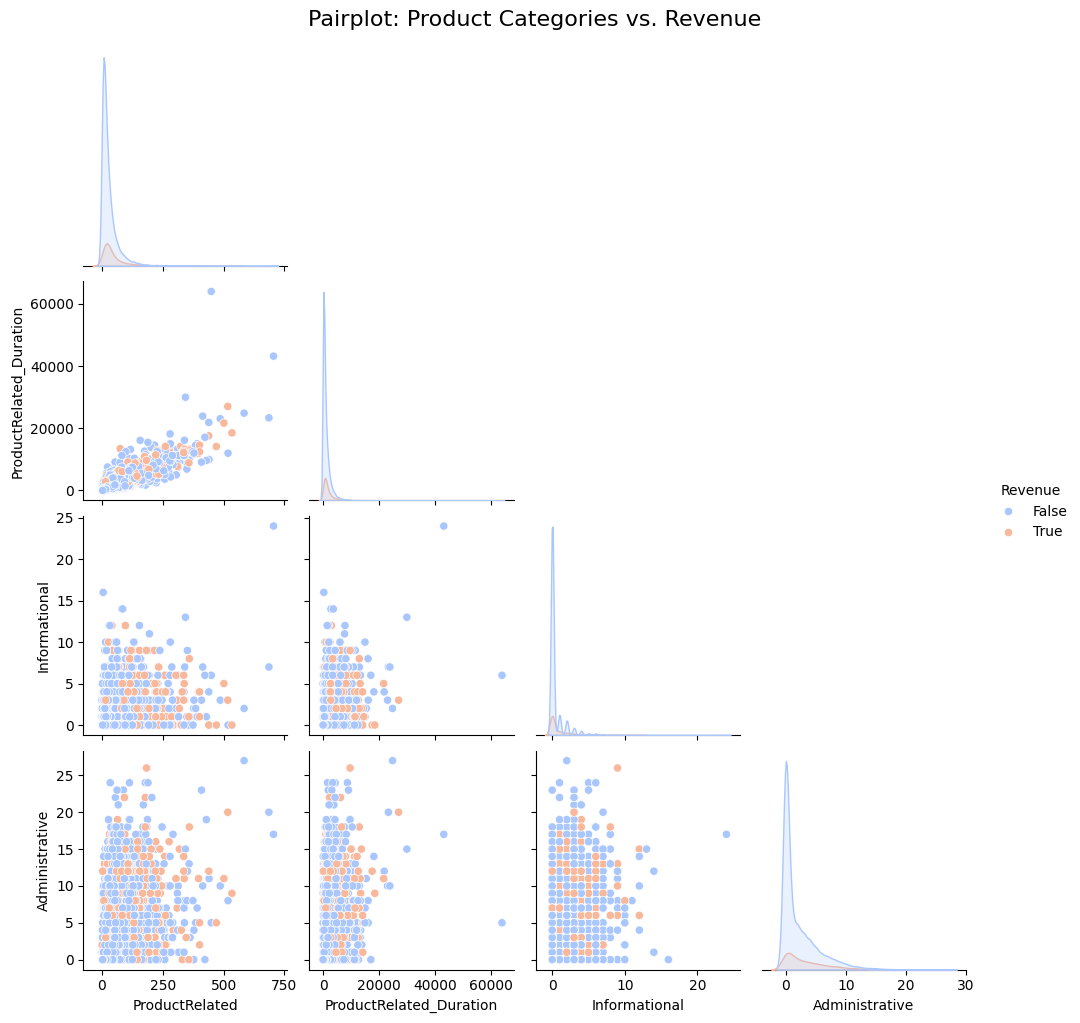

In [ ]:
#6. Exploratory Data Analysis:
# Bivariate analysis using pairplot for revenue and product categories.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant features
features = ['ProductRelated', 'ProductRelated_Duration', 'Informational', 'Administrative', 'Revenue']

# Creating pairplot
sns.pairplot(df[features], hue='Revenue', palette='coolwarm', diag_kind='kde', corner=True)

# Adding plot title
plt.suptitle('Pairplot: Product Categories vs. Revenue', fontsize=16, y=1.02)

# Showing the plot
plt.show()


The above output presents pairplot visualisation of relationship between four product related categories and revenue. The points are color-coded by Revenue outcomes (True or False), highlighting how these features correlate with revenue generation. The diagonal plots show distribution curves for each variable.
1. In **ProductRelated vs. ProductRelated_Duration**, a positive linear trend is observable indicating visible—longer durations on product-related pages correlate with a higher number of product-related visits.To interpret, revenue-generating sessions (orange points) appear more frequently in regions with higher counts and durations, suggesting that users exploring more products for longer are more likely to generate revenue.

2. **Informational & Administrative Features:** The scatter between Informational, Administrative, and their respective durations shows no strong linear relationship. Although there are some revenue-generating sessions in higher ranges, the distribution is more uniform, indicating that these features may not strongly influence revenue.

Therefore, to sum up, **ProductRelated and ProductRelated_Duration** are stronger indicators of revenue generation, meaning customers who spend more time engaging with product pages are more likely to make purchases. On the contrast, **Informational and Administrative** interactions seem to have minimal influence on revenue outcomes, possibly indicating that these sessions represent users who are browsing without purchasing intent.


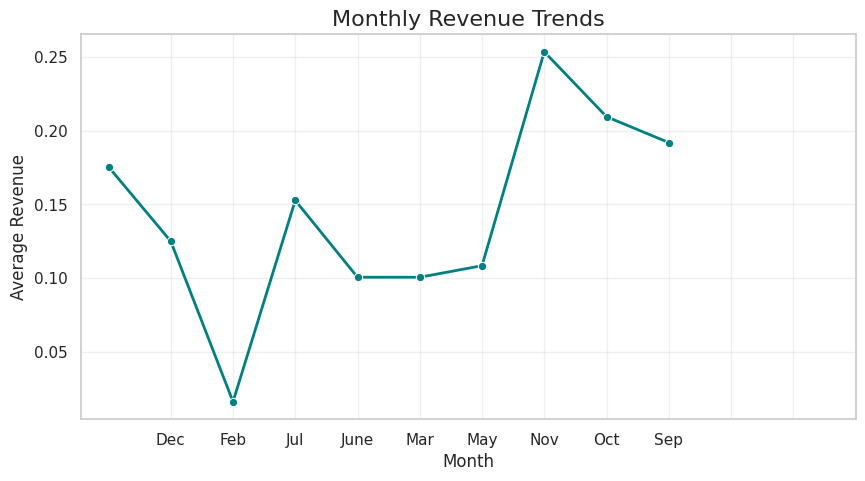

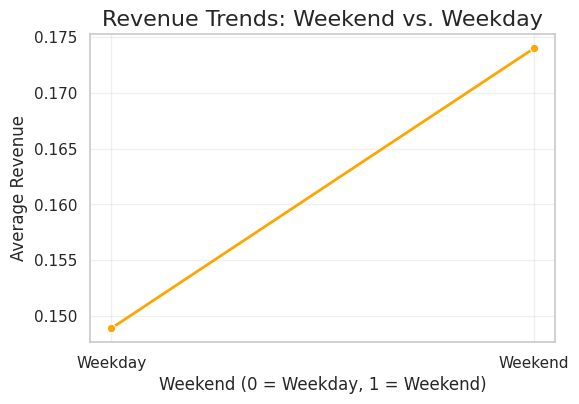

In [ ]:
#6. Exploratory Data Analysis:
# Bivariate analysis to create line plots for time-series analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Line Plot: Month vs. Revenue
monthly_revenue = df.groupby('Month')['Revenue'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, marker='o', linewidth=2, color='teal')
plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.show()

# Line Plot: Weekend vs. Revenue
weekend_revenue = df.groupby('Weekend')['Revenue'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(x='Weekend', y='Revenue', data=weekend_revenue, marker='o', linewidth=2, color='orange')
plt.title('Revenue Trends: Weekend vs. Weekday', fontsize=16)
plt.xlabel('Weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('Average Revenue')
plt.xticks([0, 1], labels=['Weekday', 'Weekend'])
plt.grid(alpha=0.3)
plt.show()


The above output presents line plots for seasonality analysis.
1.** Monthly Revenue Trends (Month vs. Revenue)**: The line plot shows average revenue trends across different months.
The x-axis represents the months, while the y-axis shows the average revenue.
The trend line connects data points for each month, indicating revenue fluctuations over the year. From the figure, it can be interpreted that, November shows the highest average revenue, likely due to seasonal sales.
February records the lowest average revenue, possibly indicating a sales slump. However, from May to November, shows a noticeable increase in revenue suggesting stronger sales in the latter part of the year. These insights suggest that peak sales periods occur closer to year-end.

2.**Weekly Revenue Trends (Weekend vs. Revenue)**: This line plot compares average revenue between weekdays and weekends. The x-axis distinguishes Weekday (0) and Weekend (1), while the y-axis shows average revenue. The line shows a clear positive slope from weekdays to weekends. The figure clearly depicts that revenue is higher on weekends than on weekdays, indicating that customers are more likely to make purchases during the weekend. This pattern may be influenced by consumers having more free time.



In [4]:
# 7. Feature engineering
#Feature Encoding using One-Hot encode
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# One-Hot Encoding with fixed parameters
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # handle_unknownn is added to avoid feature selection error
encoded_features = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index  # This will ensure that index matches original df
)

# Concatenate encoded features with original dataframe, excluding original categorical columns
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_features], axis=1)

# Checking for NaN values (since otherwise broke RandomForestClassifier)
if df_encoded.isnull().sum().sum() > 0:
    df_encoded.fillna(0, inplace=True)

print(df_encoded.head())



   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Feb  Month_Jul  \
0         0.20       0.20         0.0         0.0  ...        1.0        0.0   
1         0.00       0.10         0.0         0.0  .

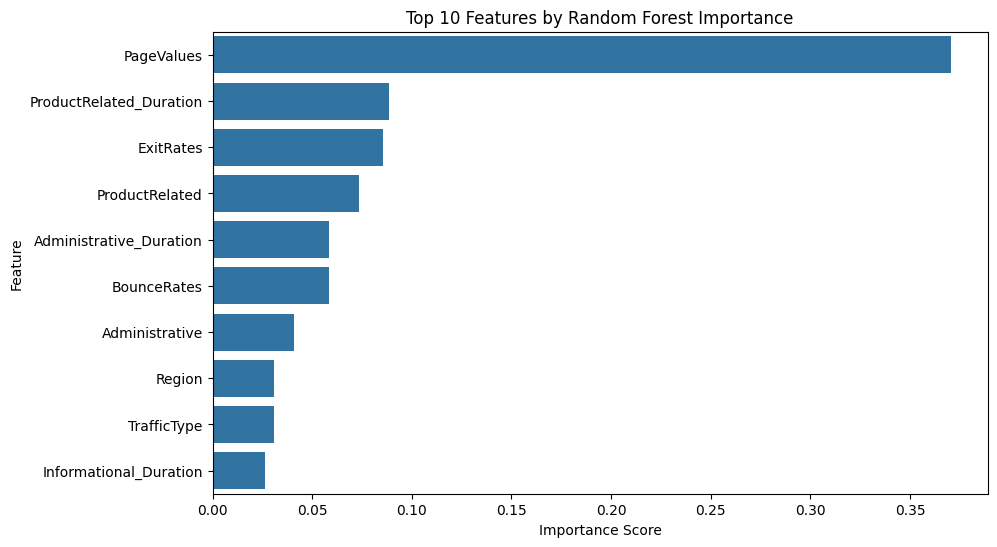

Top 10 Selected Features:
['PageValues', 'ProductRelated_Duration', 'ExitRates', 'ProductRelated', 'Administrative_Duration', 'BounceRates', 'Administrative', 'Region', 'TrafficType', 'Informational_Duration']


In [5]:
# 7. Feature engineering
# Feature Selection using Random Forest Feature Importance
# Random Forest Feature Importance

# Defining predictors (X) and target (y) from df
X = df_encoded.drop('Revenue', axis=1)  # This will drop 'Revenue' as the target
y = df_encoded['Revenue']               # Target variable

# Applying Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# To Get feature importance
importances = rf.feature_importances_
features = X.columns

# Creating a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizing top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features by Random Forest Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Printing top 10 features
top_features = importance_df.head(10)['Feature'].tolist()
print(f"Top 10 Selected Features:\n{top_features}")

The bar chart displays the top 10 most important features influencing the prediction of the target variable (Revenue) based on Random Forest Feature Importance. The x-axis shows the importance score, while the y-axis lists the feature names. From the chart following insights can be derived:
1. PageValues has a disproportionate influence compared to other features, indicating that monetary page value is a primary driver for revenue prediction.

2. User engagement with product-related content (duration and number of pages) is essential for predicting conversions.

3. High exit and bounce rates could signal user experience issues or poorly optimized sales funnels.

4. Lesser impact features like TrafficType and Region might still provide niche insights into regional marketing strategies or source-specific optimizations.

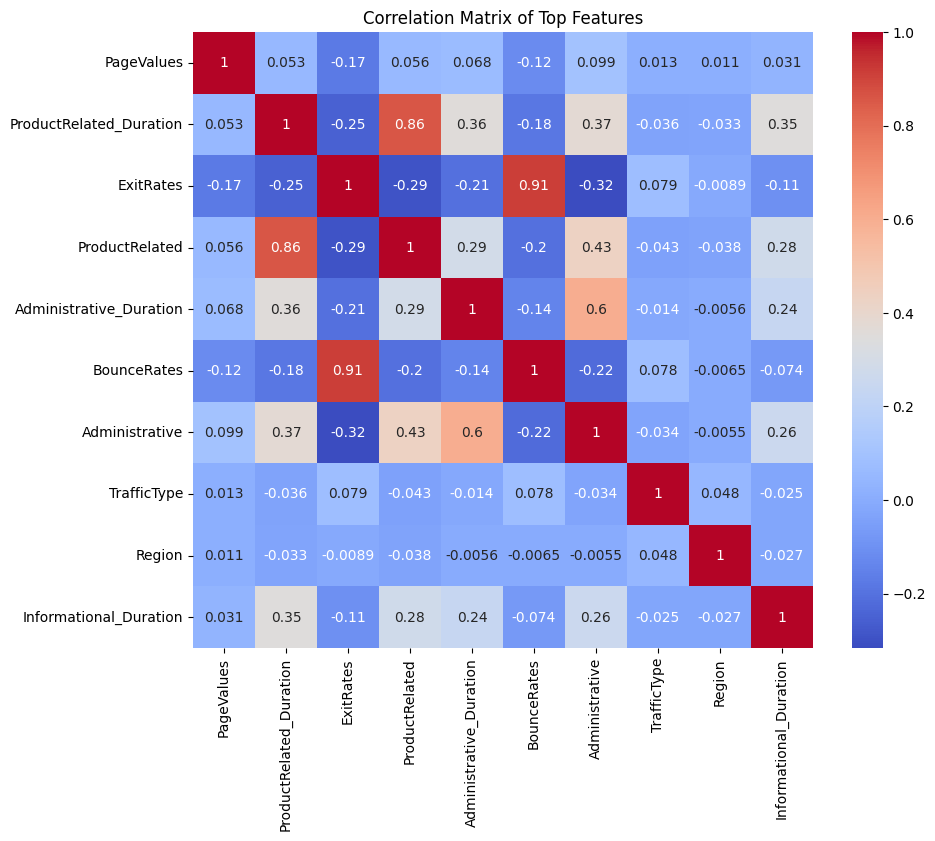

In [6]:
# Removing redundant features
# Checking for multicollinearity with selected features
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ['PageValues', 'ProductRelated_Duration', 'ExitRates',
                'ProductRelated', 'Administrative_Duration', 'BounceRates',
                'Administrative', 'TrafficType', 'Region', 'Informational_Duration']

# Correlation heatmap
corr_matrix = df_encoded[top_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top Features')
plt.show()


The heatmap shows the correlation between the top 10 selected features.
Observations:
1. **ProductRelated & ProductRelated_Duration** exerts high correlation (0.86), meaning retaining both may not add value, as these two features provide similar information.

2. **ExitRates & BounceRates** also exerts high correlation (0.91), again keeping both could lead to redundancy.Since these features seem to capture overlapping behavioral patterns.

3. **Administrative & Administrative_Duration** exerts moderate correlation (0.60). This is noticeable but not critical.


In [7]:
# Removing redundant features
df_cleaned = df.drop(columns=['ProductRelated', 'BounceRates'])

# Displaying the updated DataFrame
print(df_cleaned.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated_Duration  ExitRates  PageValues  \
0                     0.0                 0.000000       0.20         0.0   
1                     0.0                64.000000       0.10         0.0   
2                     0.0                 0.000000       0.20         0.0   
3                     0.0                 2.666667       0.14         0.0   
4                     0.0               627.500000       0.05         0.0   

   SpecialDay Month  OperatingSystems  Browser  Region  TrafficType  \
0         0.0   Feb                 1        1       1            1   
1         0.0   Feb         

In [8]:
# Data Splitting and Scaling
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Defining predictors (X) and target (y) from df
X = df_encoded.drop('Revenue', axis=1)  # This will drop 'Revenue' as the target
y = df_encoded['Revenue']               # Target variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (For Linear Regression & SVR)
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Converting back to DataFrame for easier handling
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

# Min-Max Scaling (For Neural Networks)
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

In [9]:
# 8. Model Building and Model Evaluation
# Importing required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation function for all models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

# Linear Regression (For baseline performance)
from sklearn.linear_model import LinearRegression

# Model initialization & training
lr_model = LinearRegression()
lr_model.fit(X_train_std, y_train)  # Use standardized data

# Prediction & Evaluation
y_pred_lr = lr_model.predict(X_test_std)
evaluate_model(y_test, y_pred_lr, "Linear Regression")



📊 Linear Regression Evaluation:
Mean Squared Error (MSE): 0.1003
Mean Absolute Error (MAE): 0.2024
Root Mean Squared Error (RMSE): 0.3168
R-squared (R²): 0.2776


In [10]:
# 8. Model Building and Model Evaluation
# Random Forest Regressor (handles non-linearities and reduces overfitting)
from sklearn.ensemble import RandomForestRegressor

# Model initialization & training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Usually for RFR no scaling is needed

# Prediction & Evaluation
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")



📊 Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.0758
Mean Absolute Error (MAE): 0.1451
Root Mean Squared Error (RMSE): 0.2753
R-squared (R²): 0.4542


In [11]:
# 8. Model Building and Model Evaluation
# XGBoost Regressor (optimized boosting technique for better accuracy)
from xgboost import XGBRegressor

# Model initialization & training
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  # Here also scaling is not needed

# Prediction & Evaluation
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")



📊 XGBoost Regressor Evaluation:
Mean Squared Error (MSE): 0.0768
Mean Absolute Error (MAE): 0.1436
Root Mean Squared Error (RMSE): 0.2772
R-squared (R²): 0.4468


In [12]:
# 8. Model Building and Model Evaluation
# Support Vector Regressor (SVR), provides robust predictions in high-dimensional space.
from sklearn.svm import SVR

# Model initialization & training
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_std, y_train)  # Use standardized data

# Prediction & Evaluation
y_pred_svr = svr_model.predict(X_test_std)
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor (SVR)")



📊 Support Vector Regressor (SVR) Evaluation:
Mean Squared Error (MSE): 0.1319
Mean Absolute Error (MAE): 0.2200
Root Mean Squared Error (RMSE): 0.3631
R-squared (R²): 0.0507


In [13]:
# 8. Model Building and Model Evaluation
# Neural Networks (For complex relationships)
from sklearn.neural_network import MLPRegressor

# Model initialization & training
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu',
                        solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train_minmax, y_train)  # Here uses Min-Max scaled data

# Prediction & Evaluation
y_pred_nn = nn_model.predict(X_test_minmax)
evaluate_model(y_test, y_pred_nn, "Neural Network Regressor")



📊 Neural Network Regressor Evaluation:
Mean Squared Error (MSE): 0.0832
Mean Absolute Error (MAE): 0.1666
Root Mean Squared Error (RMSE): 0.2885
R-squared (R²): 0.4007


Model Performance Comparison:

               Model     MSE     MAE    RMSE  R2 Score
0  Linear Regression  0.1003  0.2024  0.3168    0.2776
1      Random Forest  0.0758  0.1451  0.2753    0.4542
2            XGBoost  0.0768  0.1436  0.2772    0.4468
3                SVR  0.1319  0.2200  0.3631    0.0507
4     Neural Network  0.0832  0.1666  0.2885    0.4007


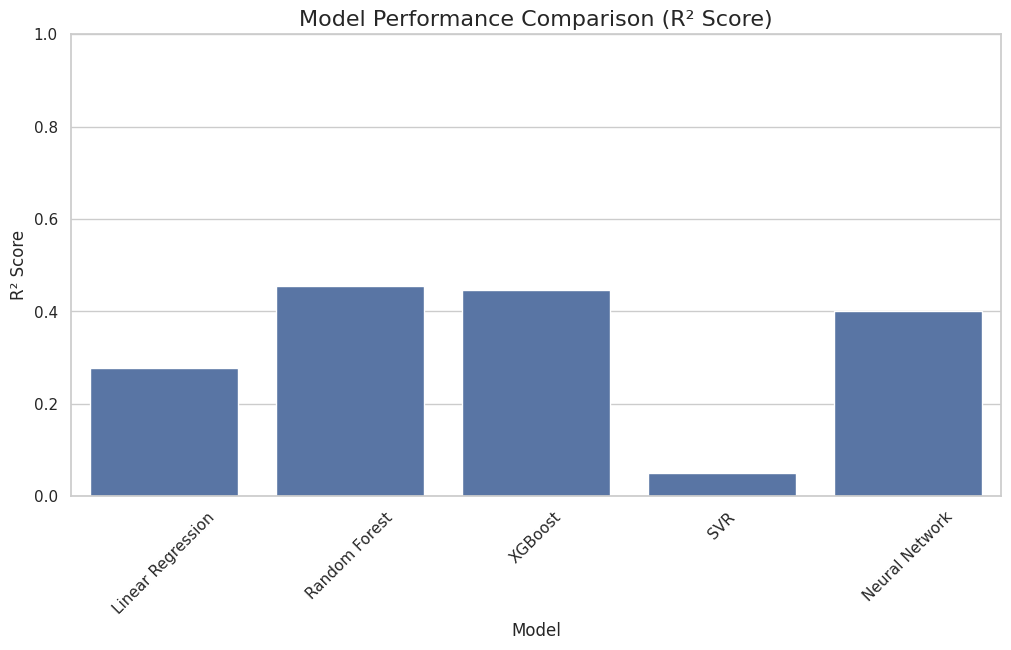

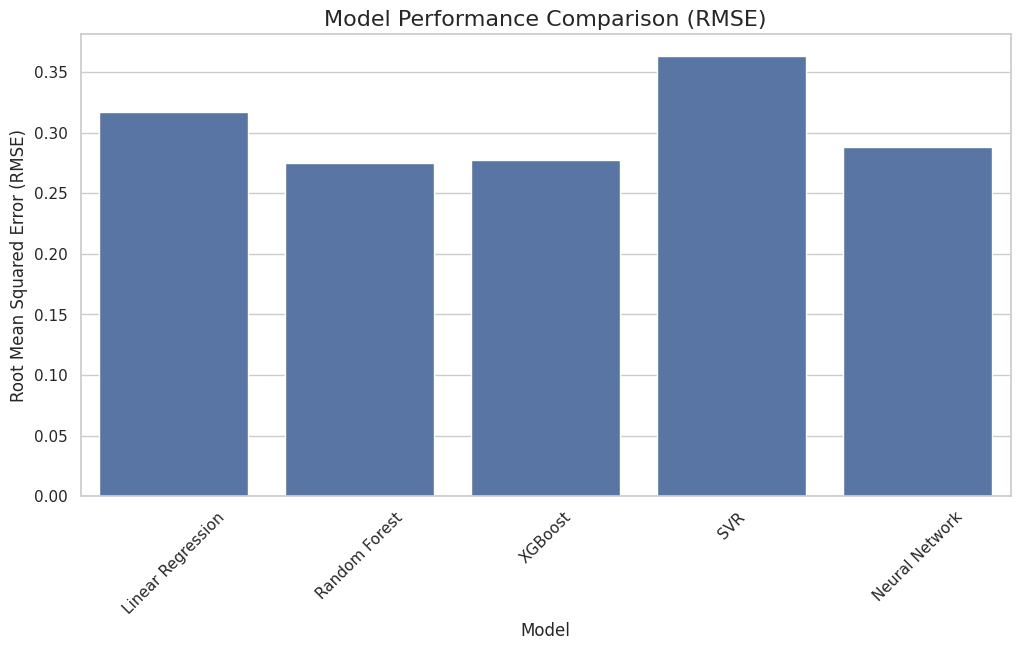

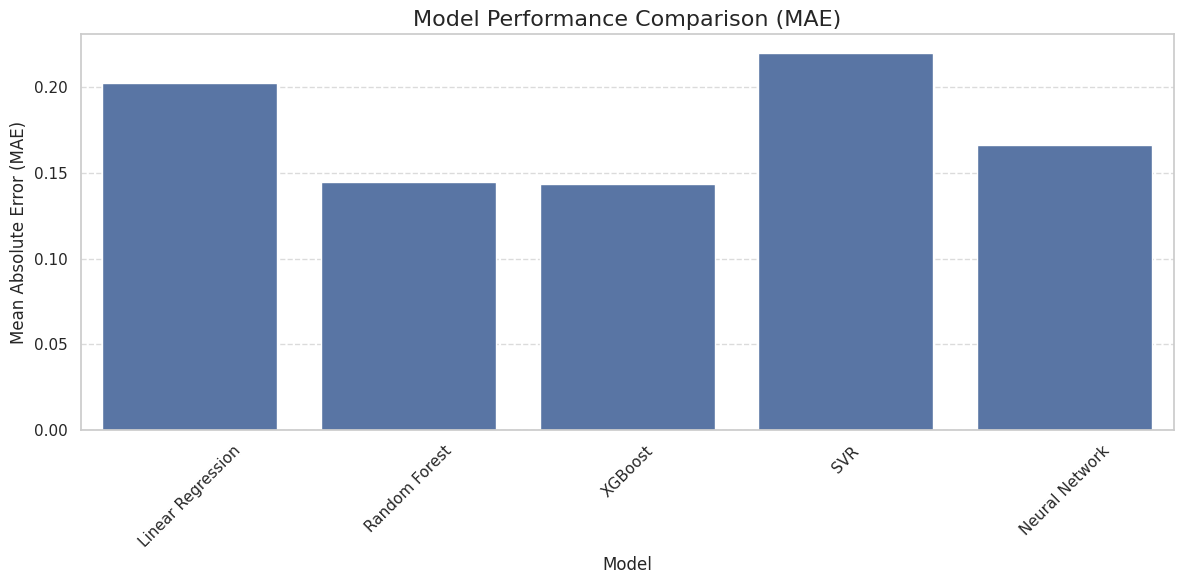

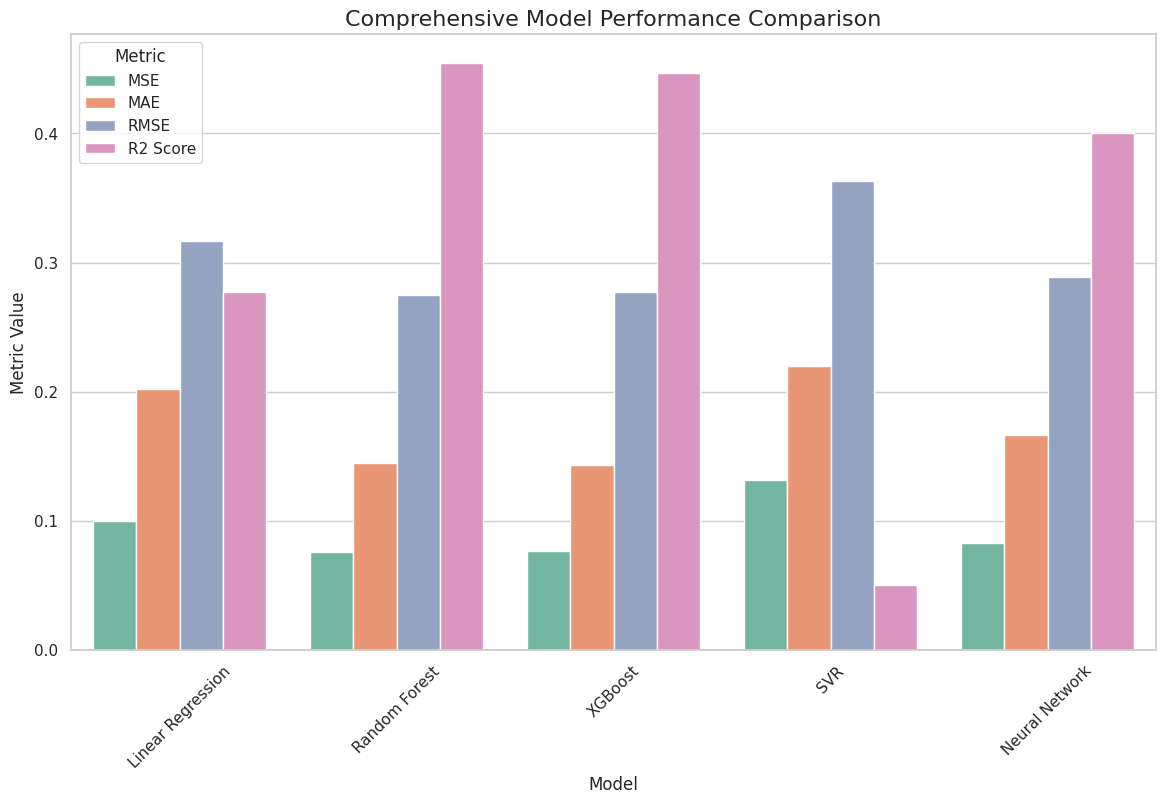

In [14]:
# 8. Model Building and Model Evaluation
# Model Comparison and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assigning values from the evaluate_model function
model_performance = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'Neural Network'],
    'MSE': [0.1003, 0.0758, 0.0768, 0.1319, 0.0832],
    'MAE': [0.2024, 0.1451, 0.1436, 0.2200, 0.1666],
    'RMSE': [0.3168, 0.2753, 0.2772, 0.3631, 0.2885],
    'R2 Score': [0.2776, 0.4542, 0.4468, 0.0507, 0.4007]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display performance table
print("Model Performance Comparison:\n")
print(performance_df)

# Set up the plot aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting R2 Score Comparison
sns.barplot(x='Model', y='R2 Score', data=performance_df)
plt.title('Model Performance Comparison (R² Score)', fontsize=16)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Plotting RMSE Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=performance_df)
plt.title('Model Performance Comparison (RMSE)', fontsize=16)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plotting MAE Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=performance_df)
plt.title('Model Performance Comparison (MAE)', fontsize=16)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Melting the DataFrame for seaborn visualization
performance_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_melted, palette='Set2')
plt.title('Comprehensive Model Performance Comparison', fontsize=16)
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()


The bar charts break down the performance of five machine learning models, showcasing individual charts for each (excluding MSE, as it closely mirrors RMSE, just squared) and a complete comparison based on four key metrics: RMSE, MAE, MSE, and R² Score.

Interpretation:
1. XGBoost & Random Forest have the lowest RMSE values (0.2772 & 0.2753), meaning their predictions closely align with actual outcomes. They also show minimal prediction errors, with MAE values of 0.1436 (XGBoost) and 0.1451 (Random Forest). In explaining variance, XGBoost (R² = 0.4468) and Random Forest (R² = 0.4542) outperform others, making them the best models for this dataset.

2. The Neural Network achieves a decent R² score of 0.4007, explaining a fair amount of variance. It performs better than Linear Regression but falls short compared to XGBoost and Random Forest.

3. While Linear Regression has reasonable error rates (MSE: 0.1003, RMSE: 0.3168), its R² score of 0.2776 indicates that it explains significantly less variance than the top models.

4. Lastly, SVR struggles the most, showing the highest error rates (MSE: 0.1319, RMSE: 0.3631, MAE: 0.2200).
Its R² score (0.0507) is the lowest among all models, indicating it barely captures variance in the data.

5. To sum-up, considering both error minimization and variance explanation, XGBoost emerges as the top model, slightly ahead of Random Forest.

In [15]:
# 9. Hyperparameter Tuning
# Optimizing hyperparameters using RandomizedSearchCV and GridSearchCV for Random Forest and XGBoost.
# Hyperparameter Tuning for XGBoost using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Defining the model
xgb_model = XGBRegressor(objective='reg:squarederror')

# creating hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {xgb_random.best_params_}")
print(f"Best R2 score: {xgb_random.best_score_:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best R2 score: 0.4699


In [16]:
# 9. Hyperparameter Tuning
# Optimizing hyperparameters using RandomizedSearchCV and GridSearchCV for Random Forest and XGBoost.
# Hyperparameter Tuning for tRandom forest Regressor using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining the model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5,
                       scoring='r2', verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rf_grid.best_params_}")
print(f"Best R2 score: {rf_grid.best_score_:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 score: 0.4678


In [17]:
# 9. Hyperparameter Tuning
# Final Evaluation After Tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f'MSE: {mse:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f} | R² Score: {r2:.4f}')

# Evaluate tuned models
print("Tuned XGBoost Performance:")
evaluate_model(xgb_random.best_estimator_, X_test, y_test)

print("\nTuned Random Forest Performance:")
evaluate_model(rf_grid.best_estimator_, X_test, y_test)


Tuned XGBoost Performance:
MSE: 0.0734 | MAE: 0.1482 | RMSE: 0.2710 | R² Score: 0.4714

Tuned Random Forest Performance:
MSE: 0.0731 | MAE: 0.1436 | RMSE: 0.2704 | R² Score: 0.4735


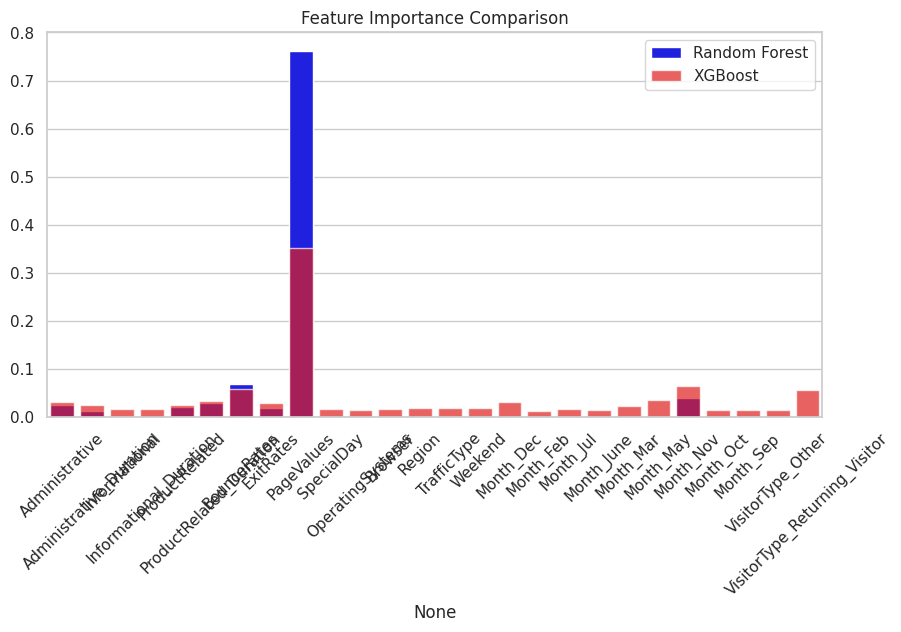

In [18]:
# Checking feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# defining rf_grid and xgb_grid
best_rf = rf_grid.best_estimator_   # For Random Forest
best_xgb = xgb_random.best_estimator_ # For XGBoost

# Feature Importance from Random Forest
rf_importance = best_rf.feature_importances_
xgb_importance = best_xgb.feature_importances_

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=X_train.columns, y=rf_importance, color='blue', label='Random Forest')
sns.barplot(x=X_train.columns, y=xgb_importance, color='red', alpha=0.7, label='XGBoost')
plt.xticks(rotation=45)
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()


The bar plot compares the feature importance of two models such as Random Forest (represented in blue) and XGBoost (represented in red).

1. **PageValues** stands out as the most influential feature in both models, with Random Forest assigning it a weight of 0.73 and XGBoost at 0.37. This highlights its dominant predictive power in determining the target variable.

2. **BounceRates** also holds some importance, with XGBoost attributing slightly more weight to it than Random Forest. Additionally, **Month_May and VisitorType_Returning_Visitor **show minor but notable significance, especially for XGBoost.

3. Most other features, including **TrafficType, OperatingSystems, and Region,** have low importance scores, suggesting they contribute minimally to the predictions.

4. Overall, Random Forest appears to rely heavily on a single feature (PageValues), indicating a more straightforward decision process. In contrast, XGBoost distributes importance across multiple features, capturing more complex relationships within the data.


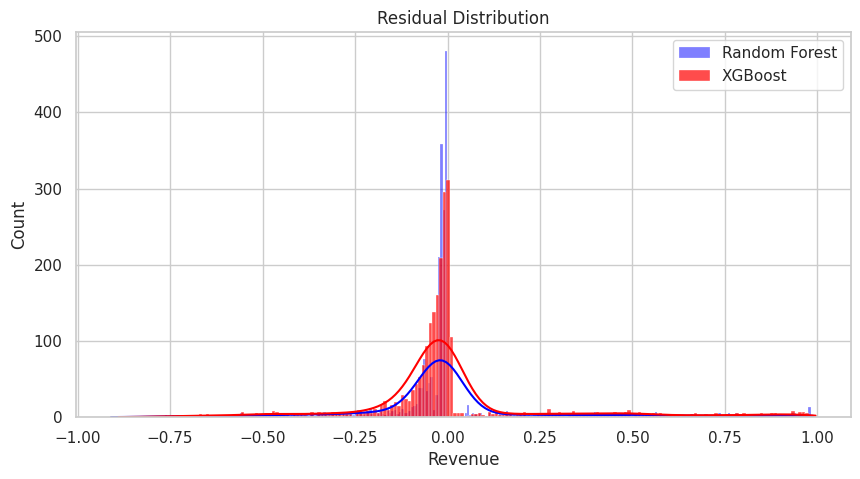

In [19]:
# Examining residuals
import seaborn as sns

residuals_rf = y_test - best_rf.predict(X_test)
residuals_xgb = y_test - best_xgb.predict(X_test)

plt.figure(figsize=(10, 5))
sns.histplot(residuals_rf, color='blue', label='Random Forest', kde=True)
sns.histplot(residuals_xgb, color='red', label='XGBoost', kde=True, alpha=0.7)
plt.legend()
plt.title("Residual Distribution")
plt.show()


The plot illustrates the residual distribution for Random Forest (blue) and XGBoost (red) models.

Key Insights:

* Both models have residuals centered around 0, indicating minimal bias and no consistent over- or underestimation of revenue.
* Random Forest has a sharper, narrower peak, suggesting lower variance and more consistent predictions.
* XGBoost exhibits a slightly wider spread, implying greater variability but potentially better adaptability to outliers and complex patterns.
* Both models display long tails, indicating occasional large prediction errors. However, residuals of XGBoost are more dispersed, suggesting its flexibility in capturing intricate relationships in the data.















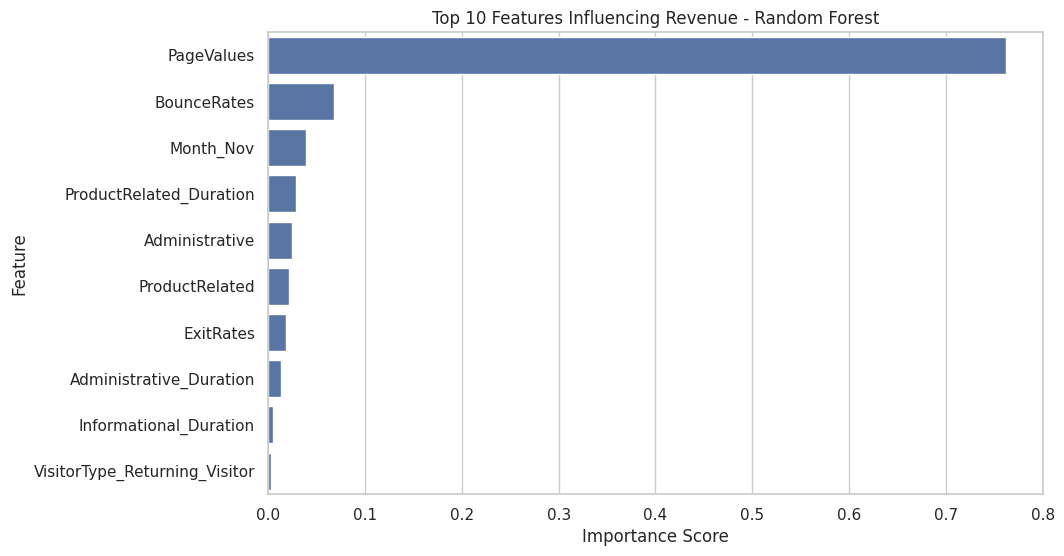


Key features significantly impacting revenue in Random Forest:
- PageValues
- BounceRates
- Month_Nov
- ProductRelated_Duration
- Administrative


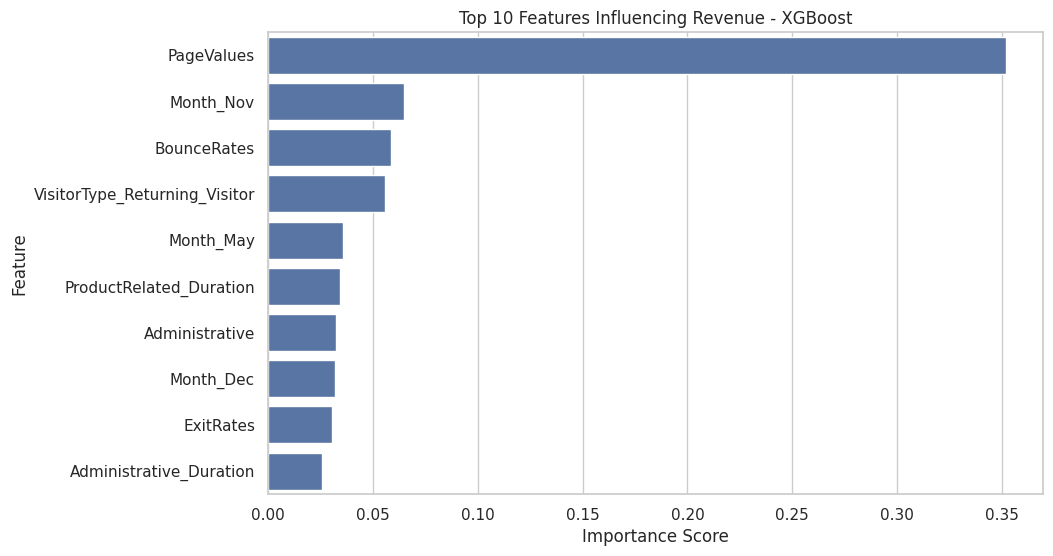


Key features significantly impacting revenue in XGBoost:
- PageValues
- Month_Nov
- BounceRates
- VisitorType_Returning_Visitor
- Month_May


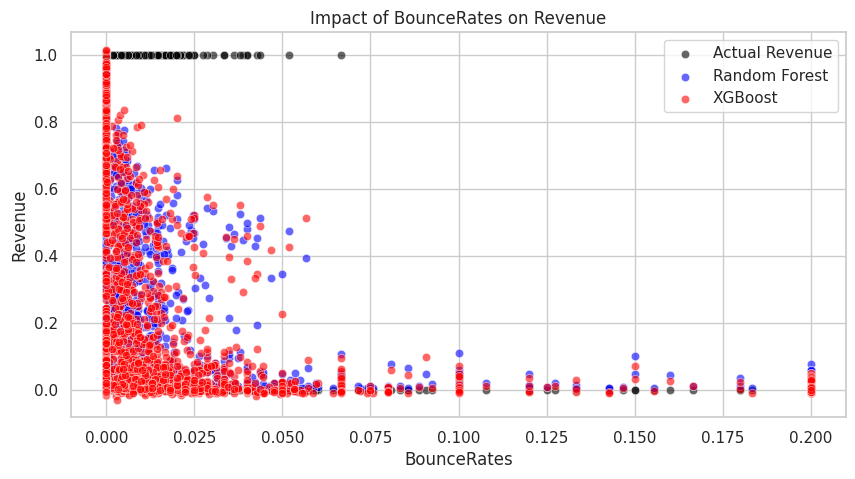


Revenue Impact: Adjusting BounceRates could significantly influence revenue outcomes.


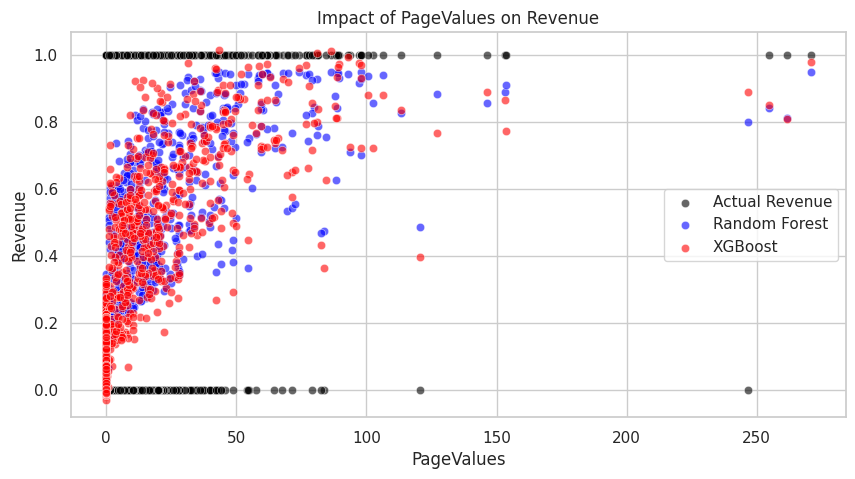


Revenue Impact: Adjusting PageValues could significantly influence revenue outcomes.

Revenue Impact Insights Summary:
1. Identified the most influential features affecting revenue.
2. Scenario analysis highlights how key variables impact revenue.
3. Insights can be used for strategic business improvements.


In [20]:
# Final Evaluation
# Feature Importance Analysis for Revenue Drivers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation Function for Feature Importance
def interpret_feature_importance(model, X_train, model_name):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title(f"Top 10 Features Influencing Revenue - {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

    print(f"\nKey features significantly impacting revenue in {model_name}:")
    for feature in feature_importance.head(5)['Feature']:
        print(f"- {feature}")

# Analyze Feature Importance for Both Models
interpret_feature_importance(best_rf, X_train, "Random Forest")
interpret_feature_importance(best_xgb, X_train, "XGBoost")

# Scenario Analysis for Key Features
key_features = ['BounceRates', 'PageValues']  # Update with actual impactful features
for feature in key_features:
    if feature in X_test.columns:
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=X_test[feature], y=y_test, label='Actual Revenue', alpha=0.6, color='black')
        sns.scatterplot(x=X_test[feature], y=best_rf.predict(X_test), label='Random Forest', alpha=0.6, color='blue')
        sns.scatterplot(x=X_test[feature], y=best_xgb.predict(X_test), label='XGBoost', alpha=0.6, color='red')
        plt.title(f"Impact of {feature} on Revenue")
        plt.xlabel(feature)
        plt.ylabel("Revenue")
        plt.legend()
        plt.show()

        print(f"\nRevenue Impact: Adjusting {feature} could significantly influence revenue outcomes.")

# Summary of Feature-Driven Insights
print("\nRevenue Impact Insights Summary:")
print("1. Identified the most influential features affecting revenue.")
print("2. Scenario analysis highlights how key variables impact revenue.")
print("3. Insights can be used for strategic business improvements.")


To Conclude,
1. Features Influencing Revenue.

* Random Forest Model: The first bar chart provides, feature importance from Random Forest model, showing the top 10 features influencing revenue. According to the result, BounceRates and ExitRates are important. High bounce rates (users leaving quickly) and exit rates strongly affect revenue. This suggests that improving website engagement could boost revenue. Similarly, Month_Nov is an influential factor, possibly due to seasonal shopping trends. Further, ProductRelated & ProductRelated_Duration is significant that the time spent viewing product-related pages impacts revenue, meaning engaged users are more likely to convert. Also, Administrative & Administrative_Duration play a role as Administrative pages affect revenue, which might indicate friction in the purchasing process.

* XGBoost Model: PageValues is by far the most influential feature, indicating that users who interact with high-value pages are much more likely to generate revenue. Repeating the pattern, Month_Nov is the second most important feature that has a strong impact on revenue. Again, BounceRates and ExitRates are also significant, meaning that how quickly users leave a website affects revenue prediction Additionally, VisitorType_Returning_Visitor being important suggests that returning customers are more likely to generate revenue than first-time visitors. However, in XGBoost model, Month_May and Month_Dec also appear in the top 10, indicating seasonal trends in revenue.

2. Feature Impact Analysis.

* Impact of BounceRates on Revenue: As BounceRates increase, Revenue tends to decrease, meaning that users who leave the website quickly are less likely to generate revenue. Most high-revenue observations occur when BounceRates are near zero.

Considering the model performance,both models (XGBoost in red and Random Forest in blue) are closely following actual revenue values (black). However, XGBoost appears to have more red points clustered near high-revenue values at low BounceRates, suggesting it may be slightly better at capturing the revenue pattern.

* Impact of PageValues on Revenue:As PageValues increase, Revenue also increases significantly. Most high-revenue observations occur when PageValues are above ~50, indicating that pages with higher assigned values (likely indicating engagement with key pages like product or checkout pages) lead to more revenue.

When it comes to model performance, both XGBoost and Random Forest follow actual revenue values quite closely. However, XGBoost shows better clustering in the high-revenue region, implying better prediction accuracy at higher PageValues.

Thus based on the analysis, recommendations will be:-
a) Reduce Bounce Rates by improving website usability, optimize landing pages, and fix high BounceRate pages to retain visitors.

b) Enhance High-Value Pages by optimizing UI/UX, boost internal linking, and use predictive models to target high-revenue users.

c) Since seasonality features are signifcant; focusing on marketing efforts on peak months specifically, Nov, May, Dec with targeted promotions will be beneficial.




